In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [262]:
import numpy as np
import math

import time
import itertools as itertools

from PIL import Image
import scipy
from scipy import misc
from scipy import ndimage

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.cm as cm

In [263]:
#import image with scipy ndimage library. mode = 'L' imports 
img = scipy.ndimage.imread('recorder.jpg', mode='L')
#set nx and ny to dimensions of image
[nx,ny] = img.shape

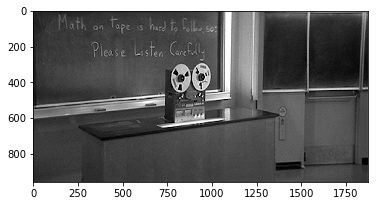

In [264]:
#show original grey scale image image
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [265]:
#compute the FFT of image using fft2
img_fft = np.fft.fft2(img)
#make plotable
F = np.log(abs(np.fft.fftshift(img_fft))+1) #this step is a little confusing. just shifts matrix and puts in real domain.

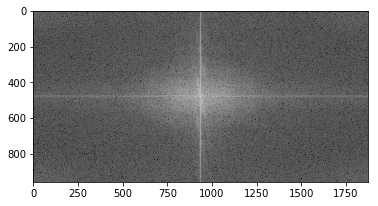

In [341]:
#show original grey scale image in frequency domain
plt.imshow(F, cmap=plt.cm.gray)
plt.show()

### Compress to 10% of Original Data

In [353]:
#zero out all small coefficients. 
#set threshold to 10% of maximum value

#Compute fourier transform of image
At = np.fft.fft2(img)

#Create a threshold at the 90% of data in frequency domain
thresh = np.percentile(abs(img_fft),90)
count=0

#for each value of matrix At (which is the fft of img) compare to the threshold.
for x in np.nditer(At, op_flags=['readwrite']):
    if abs(x) > thresh:
        x[...] = 1
        count = count + 1
    else:
        x[...] = 0

ind = np.multiply(At, img_fft)

In [354]:
#convert back into integerdata to plot. use abs of frequency data. 
new_img = np.uint8(abs(np.fft.ifft2(ind)))

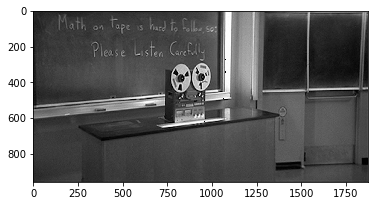

In [355]:
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()

In [356]:
#check percentage
100*(count/(nx*ny))

10.0

### Compress to 1% of Original Data

In [361]:
#zero out all small coefficients. 
#set threshold to 10% of maximum value

At = np.fft.fft2(img)
thresh = np.percentile(abs(img_fft),99)
count=0

#for each value of matrix At (which is the fft of img) compare to the threshold.
for x in np.nditer(At, op_flags=['readwrite']):
    if abs(x) > thresh:
        x[...] = 1
        count = count + 1
    else:
        x[...] = 0

ind = np.multiply(At, img_fft)

In [359]:
new_img = np.uint8(abs(np.fft.ifft2(ind)))

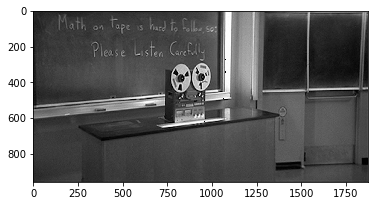

In [360]:
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()

In [349]:
#check percentage
100*(count/(nx*ny))

1.0000278357689631